## Importação de bibliotecas



In [1]:
!pip install investpy
import numpy as np
import pandas as pd
import string
import investpy as inv
import requests

!pip install yfinance
import yfinance as yf
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from random import randint

## Importação dos sticks de todos os ativos da bolsa

In [2]:
acoes = inv.get_stocks('brazil')
sticks = []

for i in acoes['symbol']:
  sticks.append(i)

In [3]:
for i in range(10):
  for i in sticks:
    if len(i) > 5:
      sticks.remove(i)
    elif i[-1] == '1':
      sticks.remove(i)
    elif i[-1] == '2':
      sticks.remove(i)
    elif i[-1] == '5':
      sticks.remove(i)
    elif i[-1] == '6':
      sticks.remove(i)
    elif i[-1] == '7':
      sticks.remove(i)
    elif i[-1] == '9':
      sticks.remove(i)

sticks.remove('LIQO3')
sticks.remove('IDNT3')
sticks.remove('ANIM3')
sticks.remove('BBSE3')
sticks.remove('CELP3')
sticks.remove('RCSL3')
sticks.remove('IRBR3')
sticks.remove('VAMO3')
sticks.remove('BMGB4')
sticks.remove('TRPN3')

## Importação de dados dos ativos

In [4]:
price = [] 
pl = []
pvp = []
lpa = []
vpa = []
roe = []

for i in sticks:
  url = 'http://fundamentus.com.br/detalhes.php?papel={}'.format(i)

  header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
  }

  r = requests.get(url, headers=header)
  error = 's'
  try:
    data = pd.read_html(r.text,  decimal=',', thousands='.')
    error = 'n'
  except:
    pass

  if error == 'n':
    price.append(float(data[0][3][0]))
    roe_var = data[2][5][8]
    dec = roe_var[-2]
    roe_var = roe_var[:-3]
    roe_var = float(roe_var) + (float(dec)/10)
    roe.append(float(roe_var))
    pl.append(float(data[2][3][1]))
    pvp.append(float(data[2][3][2]))
    lpa.append(float(data[2][5][1]))
    vpa.append(float(data[2][5][2]))

In [5]:
colunas = {'Ação' : sticks, 'Preço' : price, 'P/L' : pl, 'P/VP' : pvp, 'LPA' : lpa, 'VPA' : vpa, 'ROE': roe}

In [6]:
df = pd.DataFrame(colunas)
df

,Ação,Preço,P/L,P/VP,LPA,VPA,ROE
0,ABCB4,12.61,6.58,0.67,1.92,18.75,10.2
1,AGRO3,22.30,11.58,1.23,1.93,18.06,10.7
2,RAIL3,19.00,50.41,4.15,0.38,4.58,8.2
3,ALPA3,35.70,78.97,7.36,0.45,4.85,9.3
4,ALPA4,41.15,91.02,8.48,0.45,4.85,9.3
...,...,...,...,...,...,...,...
339,CNTO3,25.29,27.77,3.13,0.91,8.07,11.3
340,MOAR3,207.86,-37.37,2.91,-5.56,71.51,-6.2
341,BIDI3,20.67,650.09,7.47,0.03,2.77,1.1
342,VIVA3,24.88,39.29,5.44,0.63,4.57,13.9


In [7]:
filtro = df['P/L'] > 0
df = df[filtro]

In [8]:
filtro = df['ROE'] > 0
df = df[filtro]
filtro = df['P/L'] < 10
df = df[filtro]

In [9]:
df = df.sort_values(['ROE'], ascending=False)
filtro = df['P/VP'] < 2
df = df[filtro]
df = df.reset_index()

In [10]:
df

,index,Ação,Preço,P/L,P/VP,LPA,VPA,ROE
0,113,MTIG4,43.00,0.94,0.34,45.89,128.14,35.8
1,187,SMLS3,16.55,5.34,1.63,3.10,10.16,30.5
2,314,TAEE4,9.43,7.29,1.80,1.29,5.24,24.7
3,318,TAEE3,9.34,7.22,1.78,1.29,5.24,24.7
4,175,CLSC4,53.34,5.57,1.28,9.57,41.79,22.9
5,226,BNBR3,70.00,4.56,1.03,15.33,68.18,22.5
6,34,CGRA4,28.90,4.48,0.96,6.45,30.13,21.4
7,174,CGRA3,29.00,4.50,0.96,6.45,30.13,21.4
8,173,CESP3,30.50,6.59,1.39,4.63,21.91,21.1
9,328,PATI3,24.00,4.16,0.83,5.77,28.76,20.1


In [11]:
def get_acoes(num_acoes):
  acoes = []
  numeros = []
  for i in range(num_acoes):
    numeros.append(randint(0,48))
  for i in numeros:
    acoes.append(df['Ação'][i])
  return acoes

In [12]:
def cria_carteira(acoes):
  carteira = pd.DataFrame()

  for i in acoes:
    carteira[i] = yf.download(i+'.SA', start='2015-10-15', end='2020-10-14')['Adj Close']
  
  carteira = carteira/carteira.iloc[0] * 1000
  retorno = carteira.pct_change()
  retorno_total = retorno.mean() * 1250
  retorno_total = retorno_total.dropna(axis=0)
  retorno_total = retorno_total.reset_index()
  acoes = atualiza_acoes(retorno_total)

  dataframe = pd.DataFrame()
  for i in acoes:
    dataframe[i] = carteira[i]
  retorno = dataframe.pct_change()
  retorno_total = retorno.mean() * 1250
  cov = retorno.cov() * 1250
  corr = retorno.corr()

  return dataframe, retorno, retorno_total, cov, corr, acoes

In [13]:
def atualiza_acoes(retorno_total):
  acoes = []
  for i in retorno_total['index']:
    acoes.append(i)
  return acoes

In [14]:
def calcula_prvs(num_carteiras, num_sticks, retorno_total, cov):
  lista_retornos = []
  lista_volatilidade = []
  lista_sharpe_ratio = []
  lista_pesos = []

  for carteira in range(num_carteiras):
    peso = np.random.random(num_sticks)
    peso /= np.sum(peso)
    lista_pesos.append(peso)
    retorno_esperado = np.dot(peso, retorno_total)
    lista_retornos.append(retorno_esperado)
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    lista_volatilidade.append(volatilidade)
    sharpe_ratio = retorno_esperado/volatilidade
    lista_sharpe_ratio.append(sharpe_ratio)

  return lista_pesos, lista_retornos, lista_volatilidade, lista_sharpe_ratio

In [15]:
def cria_dataframe(lista_retornos, lista_volatilidade, lista_sharpe_ratio, sticks, lista_pesos):

  dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
  for contar,acao in enumerate(sticks):
    dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
  portfolios = pd.DataFrame(dic_carteiras)
  colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in sticks]
  portfolios = portfolios[colunas]
  
  return portfolios

In [16]:
def testa_sharpe_ratio(portfolios, maior_sharpe_t):
  maior_sharpe = portfolios['Sharpe Ratio'].max()
  carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
  carteira_maior_sharpe = carteira_maior_sharpe

  if maior_sharpe > maior_sharpe_t:
    maior_sharpe_t = maior_sharpe
    carteira = carteira_maior_sharpe

  return maior_sharpe_t, carteira_maior_sharpe

In [ ]:
num_acoes = 10
num_carteiras = 1000
num_combinacoes = 1000

for k in range(num_combinacoes):
  maior_sharpe_t = 0
  sticks = get_acoes(num_acoes)
  carteira_prim, retorno, retorno_total, cov, corr, acoes = cria_carteira(sticks)
  lista_pesos, lista_retornos, lista_volatilidade, lista_sharpe_ratio = calcula_prvs(num_carteiras, len(acoes), retorno_total, cov)
  portfolio = cria_dataframe(lista_retornos, lista_volatilidade, lista_sharpe_ratio, acoes, lista_pesos)
  sharpe, carteira = testa_sharpe_ratio(portfolio, maior_sharpe_t)

name = 'Sharpe Ratio = {}'.format(round(sharpe,2))
carteira.to_excel(name+'.xlsx')

[*********************100%***********************]  1 of 1 completed


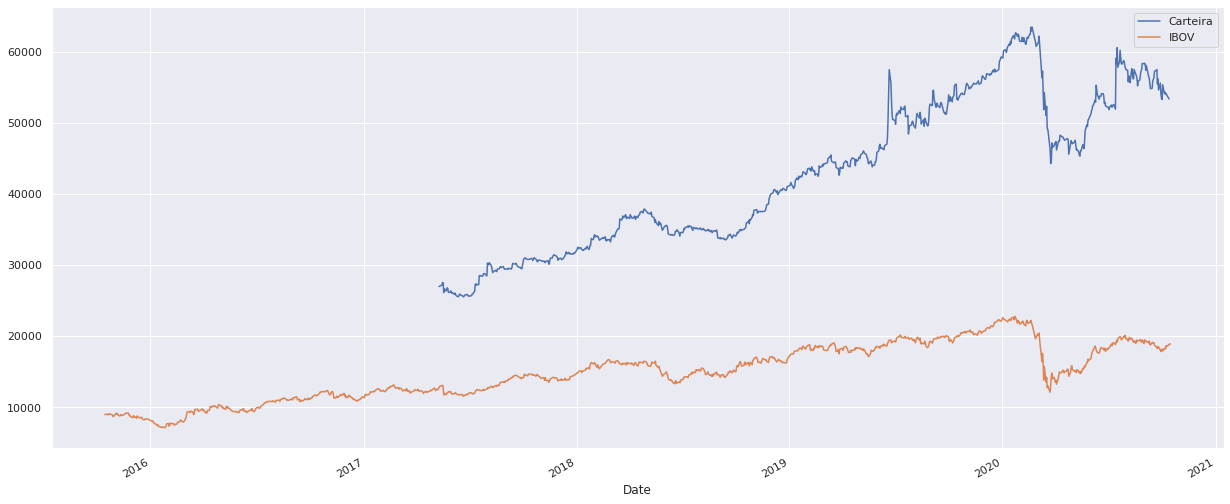

In [21]:
carteira_seg = carteira_prim
carteira_seg['Saldo'] = carteira_seg[:].sum(axis=1)
carteira_seg['Saldo'].plot(figsize=(21,9))

ibov = yf.download('^BVSP', period='5y')['Adj Close']
ibov = ibov/ibov.iloc[0] * len(acoes) * 1000
ibov.plot(figsize=(21,9))
label =['Carteira', 'IBOV']
plt.legend(label)

In [23]:
cagr = ((carteira_prim['Saldo'][-1] / carteira_prim['Saldo'][0]) ** (1/5)) - 1
cagr

0.14603111458607465